## US home price analysis for last 20 years.

> ###  Key factors that influence US home prices :

*   CSUSHPISA - Case-Shiller U.S. National Home Price Index
*   HOUST - New Privately-Owned Housing Units Started: Total Units
*   MSACSR - Monthly Supply of New Houses in the United States
*   PERMIT - New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units
*   UNRATE - Unemployment Rate
*   POPTHM - Population
*   FEDFUNDS - Federal Funds Effective Rate (Interest Rate)
*   GDP - Gross Domestic Product
*   TTLCONS - Total Construction Spending: Total Construction in the United States
*   MSPUS - Median Sales Price of Houses Sold for the United States

Import libraries :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the datasets :

In [2]:
csushpisa = pd.read_csv('CSUSHPISA.csv', parse_dates=['DATE'])
fedfunds = pd.read_csv('FEDFUNDS.csv', parse_dates=['DATE'])
houst = pd.read_csv('HOUST.csv', parse_dates=['DATE'])
msacsr = pd.read_csv('MSACSR.csv', parse_dates=['DATE'])
permit = pd.read_csv('PERMIT.csv', parse_dates=['DATE'])
popthm = pd.read_csv('POPTHM.csv', parse_dates=['DATE'])
unrate = pd.read_csv('UNRATE.csv', parse_dates=['DATE'])
gdp = pd.read_csv('GDP.csv', parse_dates=['DATE'])
ttlcons = pd.read_csv('TTLCONS.csv', parse_dates=['DATE'])
mspus = pd.read_csv('MSPUS.csv', parse_dates=['DATE'])

Merge datasets based on date :

In [3]:
merged_df = csushpisa.merge(fedfunds, on='DATE', how='left') \
                    .merge(houst, on='DATE', how='left') \
                    .merge(msacsr, on='DATE', how='left') \
                    .merge(permit, on='DATE', how='left') \
                    .merge(popthm, on='DATE', how='left') \
                    .merge(unrate, on='DATE', how='left') \
                    .merge(gdp, on='DATE', how='left') \
                    .merge(ttlcons, on='DATE', how='left') \
                    .merge(mspus, on='DATE', how='left')

Filter data from 2004-01-01 to 2023-12-01 :

In [4]:
merged_df = merged_df[(merged_df['DATE'] >= '2004-01-01') & (merged_df['DATE'] <= '2024-01-01')]

In [5]:
merged_df.isnull().sum()

DATE           0
CSUSHPISA      0
FEDFUNDS       0
HOUST          0
MSACSR         0
PERMIT         0
POPTHM         0
UNRATE         0
GDP          160
TTLCONS        0
MSPUS        160
dtype: int64

Fill null values with forward fill (GDP and MSPUS are quarterly datasets, so they have null values for other months) :

In [6]:
merged_df.fillna(method='ffill', inplace=True)
merged_df.reset_index(drop=True,inplace=True)

In [7]:
merged_df.isnull().sum()

DATE         0
CSUSHPISA    0
FEDFUNDS     0
HOUST        0
MSACSR       0
PERMIT       0
POPTHM       0
UNRATE       0
GDP          0
TTLCONS      0
MSPUS        0
dtype: int64

In [8]:
merged_df

,DATE,CSUSHPISA,FEDFUNDS,HOUST,MSACSR,PERMIT,POPTHM,UNRATE,GDP,TTLCONS,MSPUS
0,2004-01-01,141.646,1.00,1911.0,3.8,1952.0,292046.0,5.7,11923.447,938525.0,212700.0
1,2004-02-01,143.191,1.01,1846.0,3.7,1966.0,292230.0,5.6,11923.447,937813.0,212700.0
2,2004-03-01,145.058,1.00,1998.0,3.6,2066.0,292434.0,5.8,11923.447,961159.0,212700.0
3,2004-04-01,146.592,1.00,2003.0,4.0,2070.0,292651.0,5.6,12112.815,967602.0,217600.0
4,2004-05-01,148.185,1.00,1981.0,3.8,2150.0,292872.0,5.6,12112.815,974381.0,217600.0
...,...,...,...,...,...,...,...,...,...,...,...
236,2023-09-01,311.065,5.33,1363.0,7.5,1515.0,335612.0,3.8,27610.128,2017510.0,435400.0
237,2023-10-01,312.946,5.33,1365.0,7.9,1534.0,335773.0,3.8,27956.998,2058903.0,423200.0
238,2023-11-01,313.629,5.33,1510.0,8.8,1508.0,335925.0,3.7,27956.998,2082923.0,423200.0
239,2023-12-01,314.338,5.33,1568.0,8.2,1530.0,336070.0,3.7,27956.998,2101042.0,423200.0


Select features and target variable :

In [9]:
features = ['HOUST', 'MSACSR', 'PERMIT', 'UNRATE', 'POPTHM', 'FEDFUNDS', 'GDP', 'TTLCONS', 'MSPUS']
target = 'CSUSHPISA'

## Data Visualization :

Time Series Plots :
* Plotting the time series of each variable helps us understand trends and patterns in the data. We can see how the Case-Shiller Home Price Index has fluctuated over time, as well as the behavior of other factors like interest rates, GDP, and housing starts.

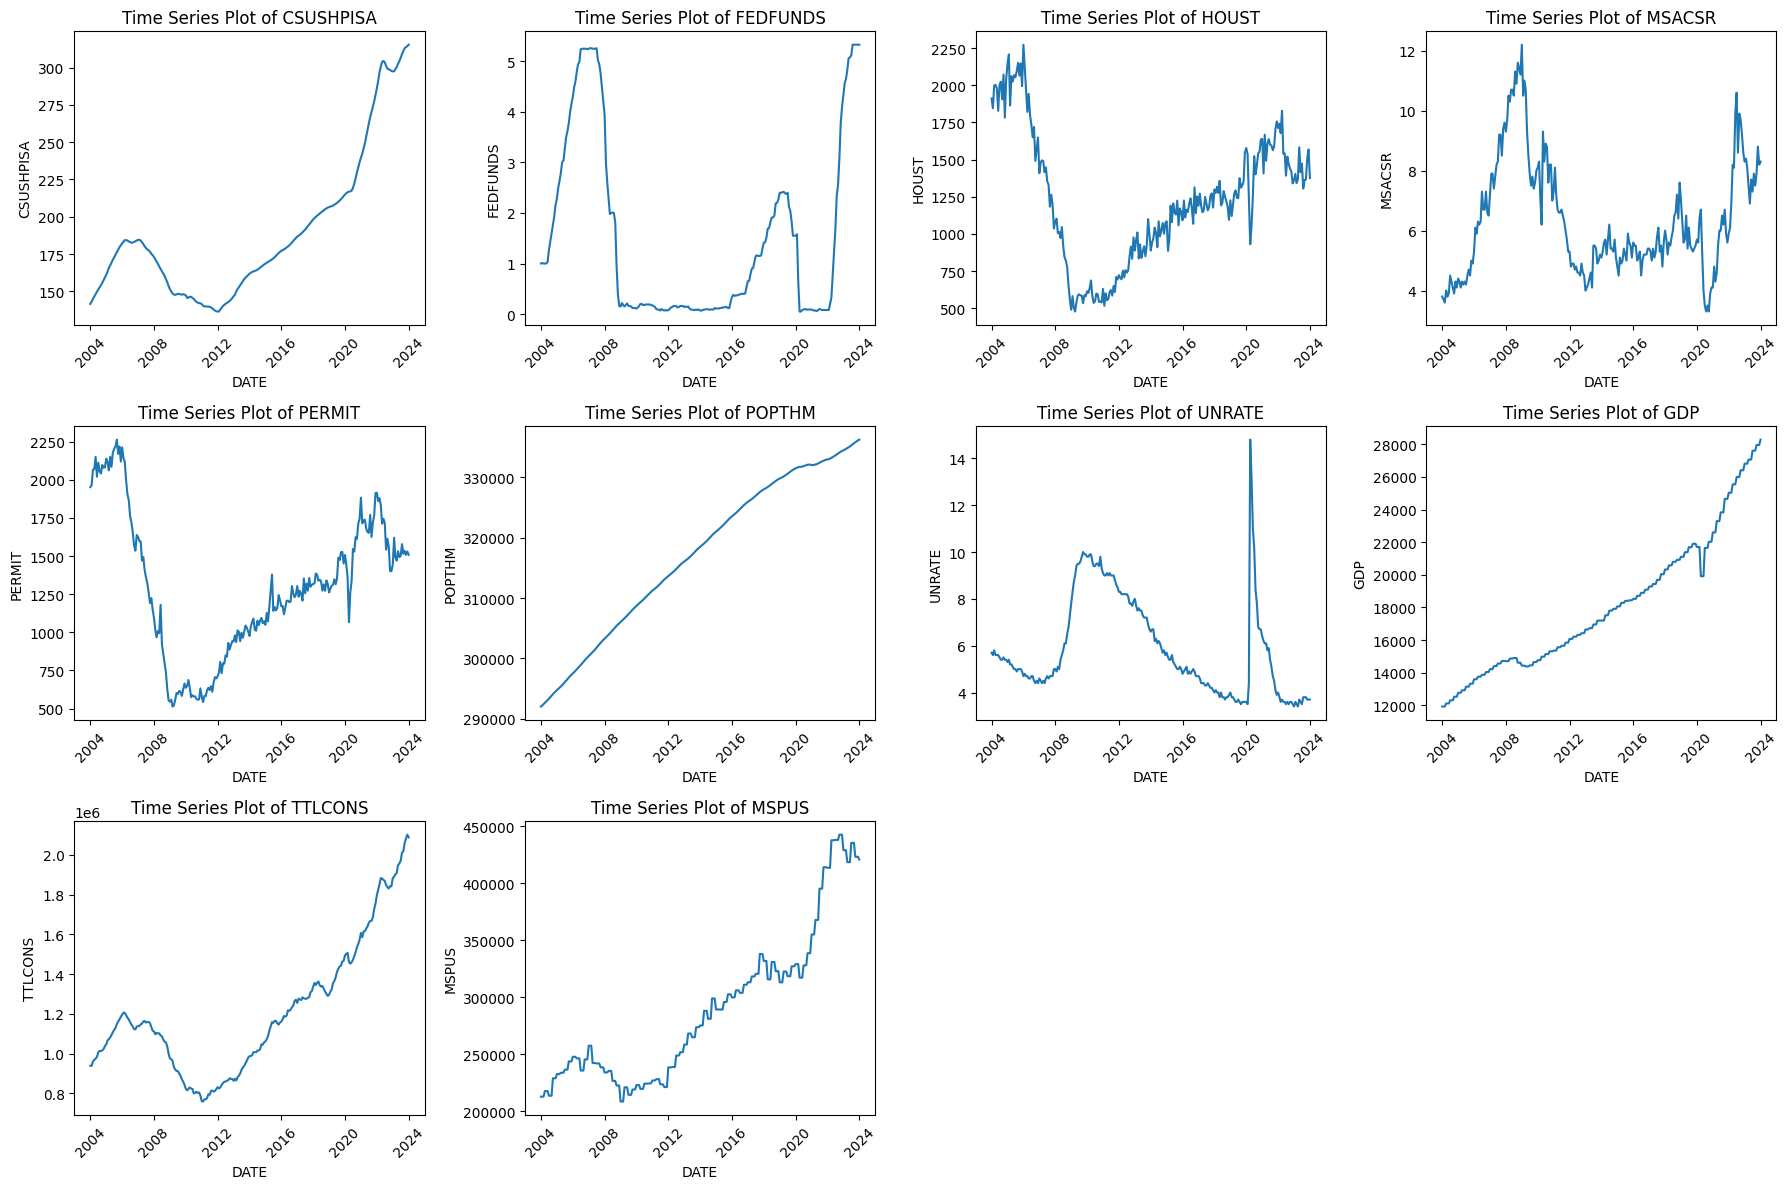

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(merged_df.columns[1:]):
    sns.lineplot(x="DATE", y=col, data=merged_df, ax=axes[i])
    axes[i].set_title(f"Time Series Plot of {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Remove any extra empty subplots
for i in range(10, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Histograms :
* Histograms give us a visual representation of the distribution of each feature. This can be helpful in identifying outliers or skewness in the data.

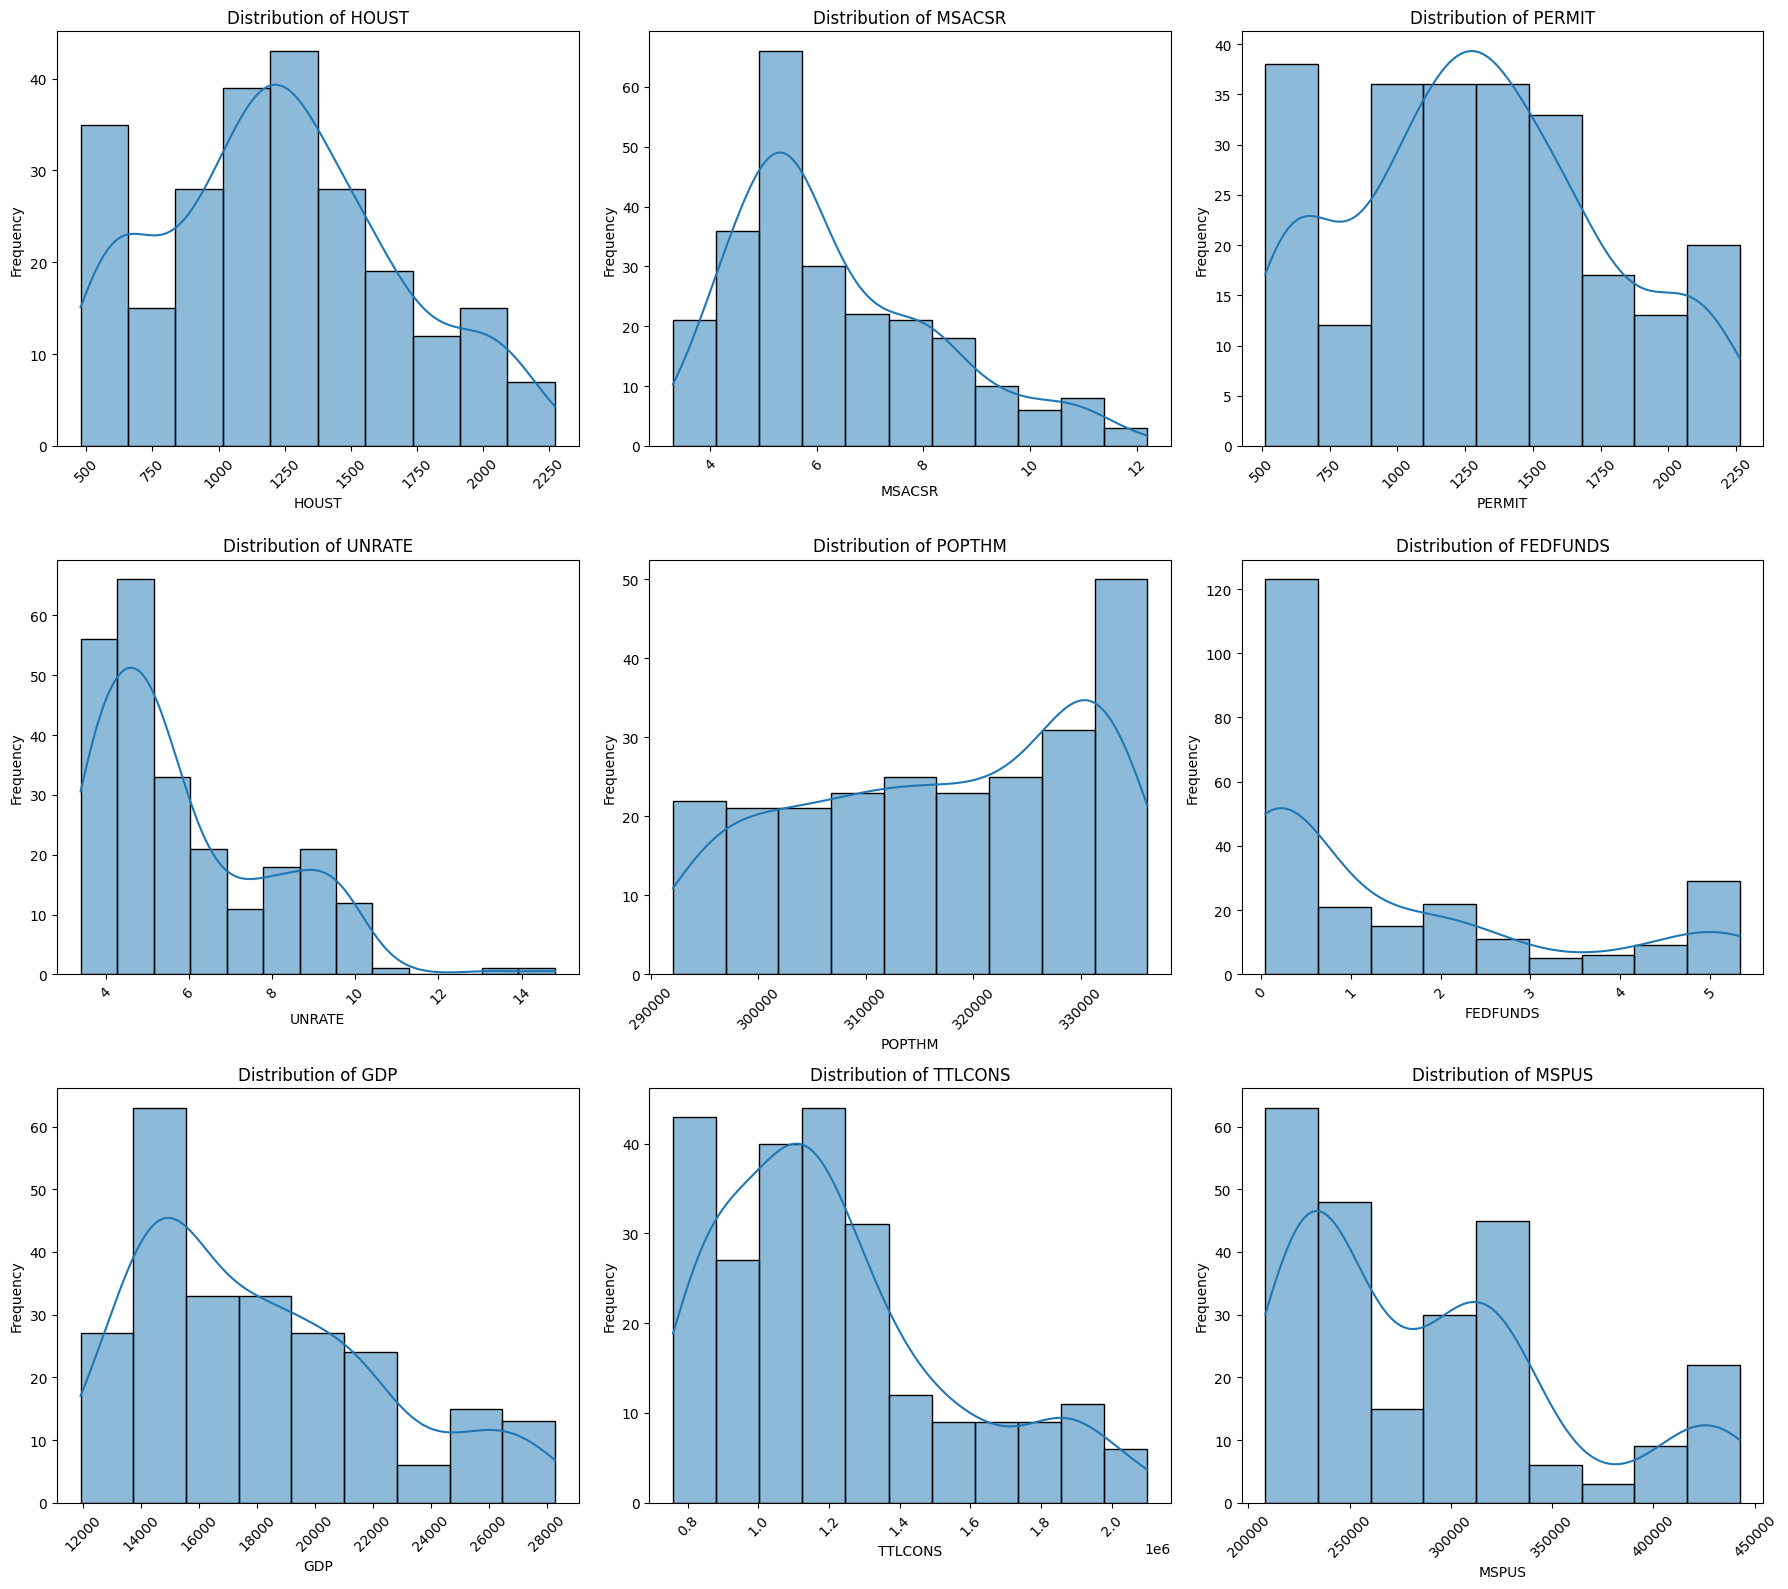

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(merged_df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Correlation Matrix :

* This is crucial for understanding how the features relate to each other and to the target variable (home prices). High correlations can indicate multicollinearity, which might affect the model's performance.

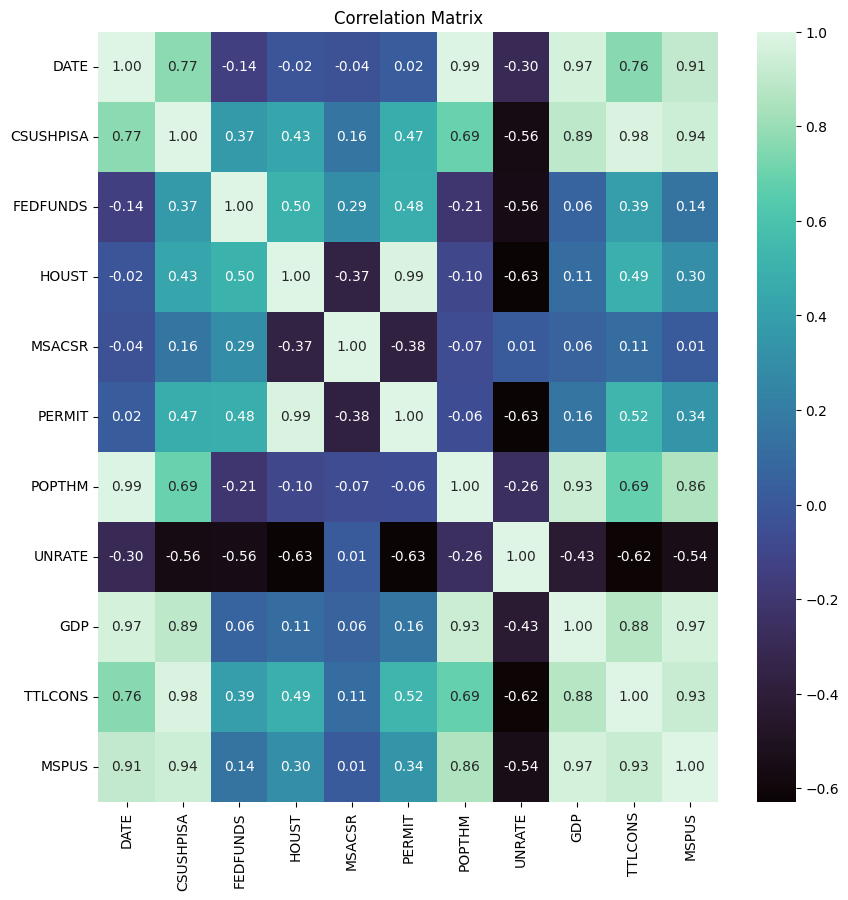

In [36]:
correlation_matrix = merged_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Building data science model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

Split the data into training and testing sets :

* We split the data into training and testing sets (80% for training, 20% for testing) using train_test_split. This ensures that we can evaluate the model's ability to generalize to unseen data.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(merged_df[features], merged_df[target], test_size=0.2, random_state=42)

Standardize the features :
* We use StandardScaler to standardize the features. This helps improve the performance of certain models, especially linear models.

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Selection: We chose a variety of regression models :
* Linear Regression: A basic linear model.
* Elastic Net Regression: A linear model with regularization (L1 and L2 penalties) to prevent overfitting and handle multicollinearity.
* Decision Tree Regression: A non-linear model that creates a tree-like structure of decisions to predict the target variable.
* Random Forest Regression: An ensemble method that combines multiple decision trees to improve prediction accuracy.

In [40]:
models = {
    'Linear Regression': LinearRegression(),
    'Elastic Net Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42)
}

Model Evaluation :

* Mean Squared Error (MSE): Measures the average squared difference between the actual and predicted values. Lower MSE indicates better performance.

* R-squared (R2): Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R2 value (closer to 1) suggests a better fit of the model to the data, indicating how well the features explain the variation in home prices.

* Actual vs. Predicted Plots: Visualize how well the model's predictions align with the actual home prices.

* Coefficients: The sign (positive or negative) of the coefficient indicates the direction of the relationship between the feature and home prices. The magnitude represents the strength of the influence.

* Feature Importance (Tree-Based Models): Indicates which features were most influential in the predictions of tree-based models.

Train and evaluate each model :

--- Linear Regression ---
Mean Squared Error: 14.229322711627205
R-squared: 0.994743272123202



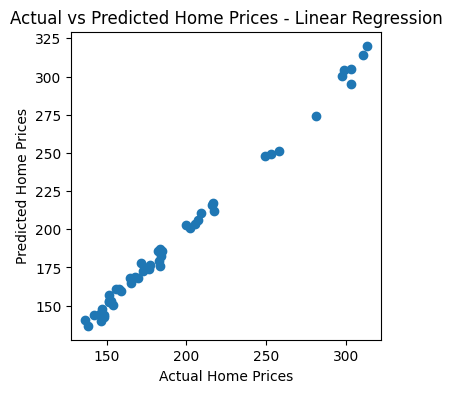

--- Linear Regression Coefficients ---
    Feature  Coefficient
6       GDP    26.237778
8     MSPUS    16.717453
7   TTLCONS    15.752650
2    PERMIT     6.462311
3    UNRATE     6.152173
1    MSACSR     5.506263
5  FEDFUNDS     2.683097
0     HOUST     1.543296
4    POPTHM   -13.964592


--- Elastic Net Regression ---
Mean Squared Error: 123.19595625662501
R-squared: 0.9544878114940916



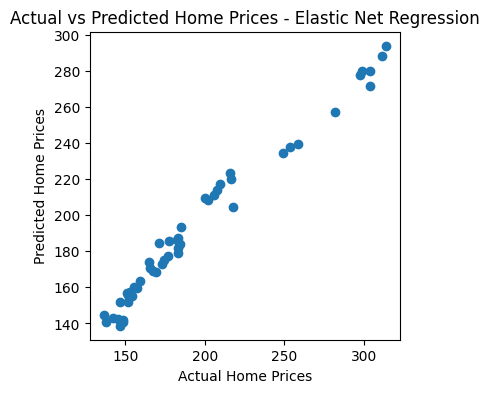

--- Elastic Net Regression Coefficients ---
    Feature  Coefficient
7   TTLCONS    12.125470
8     MSPUS    10.342862
6       GDP     9.917607
4    POPTHM     4.870462
1    MSACSR     4.751232
2    PERMIT     4.480671
5  FEDFUNDS     4.106655
0     HOUST     3.816687
3    UNRATE    -0.000000


--- Decision Tree Regression ---
Mean Squared Error: 7.197490530612243
R-squared: 0.9973410365424953



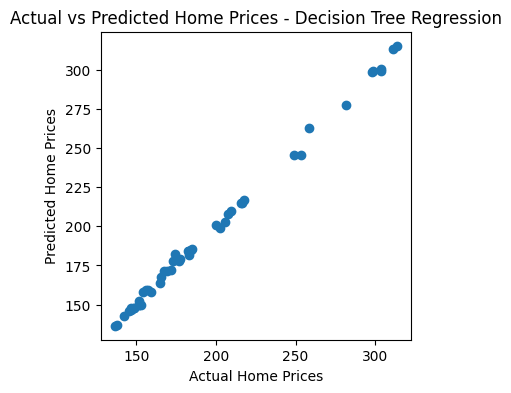

--- Decision Tree Regression Feature Importance ---
    Feature  Importance
6       GDP    0.750755
7   TTLCONS    0.202485
4    POPTHM    0.039617
5  FEDFUNDS    0.003498
8     MSPUS    0.001802
3    UNRATE    0.001404
1    MSACSR    0.000235
0     HOUST    0.000120
2    PERMIT    0.000084


--- Random Forest Regression ---
Mean Squared Error: 3.234844772695971
R-squared: 0.9988049537537124



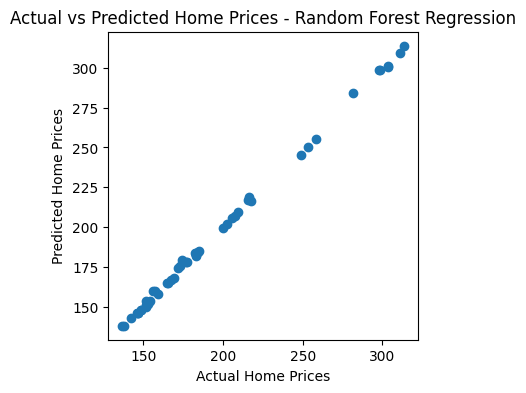

--- Random Forest Regression Feature Importance ---
    Feature  Importance
7   TTLCONS    0.403529
4    POPTHM    0.234452
8     MSPUS    0.226626
6       GDP    0.115031
3    UNRATE    0.015038
1    MSACSR    0.002520
5  FEDFUNDS    0.001512
2    PERMIT    0.000885
0     HOUST    0.000407




In [41]:
for model_name, model in models.items():

    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {model_name} ---")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}\n")

    # Plot actual vs predicted for each model
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Home Prices")
    plt.ylabel("Predicted Home Prices")
    plt.title(f"Actual vs Predicted Home Prices - {model_name}")
    plt.show()

    # For linear models, print the coefficients
    if isinstance(model, LinearRegression) or isinstance(model, ElasticNet):
        coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
        print(f"--- {model_name} Coefficients ---")
        print(coefficients.sort_values(by='Coefficient', ascending=False))
        print("\n")

    # Print feature importance for tree-based models
    elif isinstance(model, (DecisionTreeRegressor, RandomForestRegressor)):
        feature_importances = model.feature_importances_
        importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
        print(f"--- {model_name} Feature Importance ---")
        print(importance_df.sort_values(by='Importance', ascending=False))
        print("\n")

## Result

### Model Performance:

> Random Forest Regression: This model clearly outperforms the others with the lowest MSE (3.23) and the highest R-squared (0.9988). This suggests that Random Forest is best at capturing the complex relationships in your data.

> Decision Tree Regression: Also performs very well, with a low MSE (7.19) and a high R-squared (0.9973). However, Random Forest, being an ensemble of decision trees, provides better generalization and avoids overfitting.

> Linear Regression: Has a decent performance (MSE: 14.22, R-squared: 0.9947), but not as good as the tree-based models. This might indicate that the relationships between some features and home prices are not strictly linear.

> Elastic Net Regression: Performs the worst in this case (MSE: 123.19, R-squared: 0.9544). The regularization might be too strong, or the chosen hyperparameters (alpha and l1_ratio) might not be optimal for this dataset.

### Feature Importance and Coefficients:

> MSPUS Dominates: As expected, MSPUS (Median Sales Price of Houses Sold) is a very strong predictor. It has the highest coefficient in Linear Regression and is among the top features in importance for both Decision Tree and Random Forest.

> TTLCONS (Total Construction Spending): Also emerges as a highly important feature, especially in Random Forest. This makes sense, as construction spending is directly related to the housing market's activity.

> GDP and POPTHM: GDP and population (POPTHM) are consistently important across all models, highlighting the influence of economic growth and demographic factors on home prices.

> UNRATE (Unemployment Rate): The positive coefficient for UNRATE in Linear Regression is still counterintuitive. This might be due to complex interactions not captured by the linear model or other economic factors not included in the dataset. The relationship between unemployment and home prices isn't always straightforward. It can be influenced by various other economic forces like demand and regional variations.

### Analysis of Plots:

> The scatter plots for Random Forest and Decision Tree show a very tight clustering of points along the diagonal, indicating excellent predictive accuracy.

> The Linear Regression plot also shows a good linear relationship, but there is slightly more scatter.

> The Elastic Net plot has the most scatter, reflecting its lower performance.